<h1>Análisis Dataset Iris con Python</h1>

<h3>1 Carga de datos</h3>

Importamos el archivo `csv` guardado localmente en la carpeta `/data` con pandas y mostramos las 5 primeras filas para comprovar que se ha cargado correctamente

In [7]:
import pandas as pd

df = pd.read_csv("./data/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h3>2 Transformación de datos</h3>

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Información básica del dataset
df.info()

# Descripción estadística
df.describe()

# Revisamos si hay valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Eliminamos la columna Id
df = df.drop(columns=['Id'])

# Convertimos la columna 'Species' a números usando LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Revisamos el resultado
df.head()

# Comprobar qué número corresponde a cada especie
print("\nMapa de números a especies:")
for i, specie in enumerate(le.classes_):
    print(f"{i} -> {specie}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
Valores nulos por columna:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Mapa de números a especies:
0 -> Iris-setosa
1 -> Iris-versicolor
2 -> Iris-virginica


<h3>3 Análisi de datos</h3>

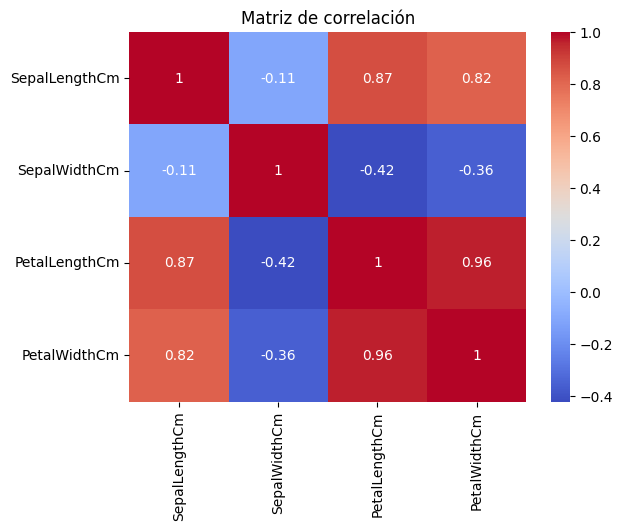

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas excepto 'Species'
corr_df = df.drop(columns=['Species'])

# Matriz de correlación
corr = corr_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


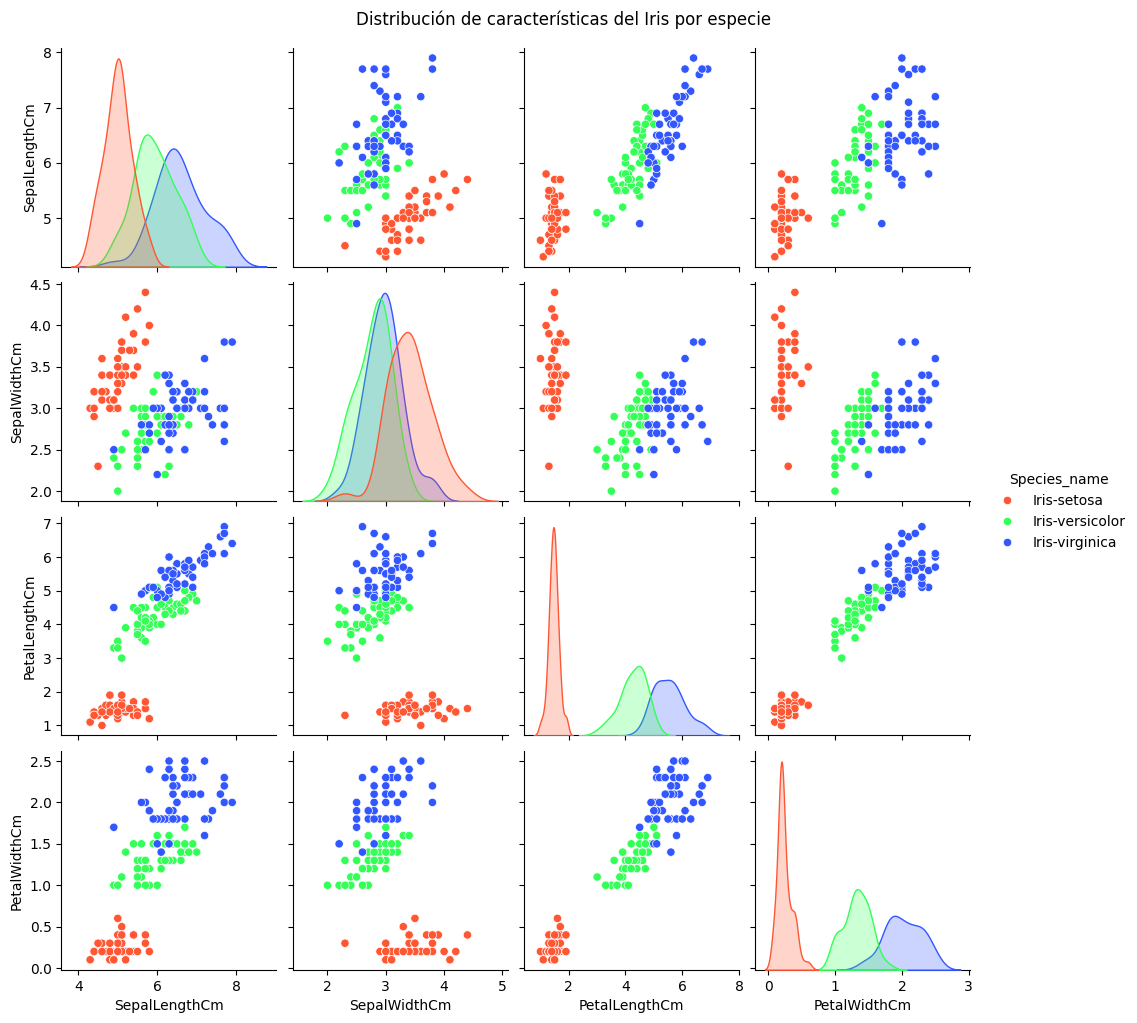

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una columna temporal con los nombres de las especies para la leyenda
species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['Species_name'] = df['Species'].map(species_names)

# Seleccionamos solo las columnas numéricas para el pairplot
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Colores personalizados
colors = ["#FF5733", "#33FF57", "#3357FF"]

# Creamos el pairplot usando la columna temporal solo para la leyenda
pairplot = sns.pairplot(df[numeric_cols + ['Species_name']], hue='Species_name', palette=colors)

# Agregamos un título
pairplot.fig.suptitle("Distribución de características del Iris por especie", y=1.02)

plt.show()

# Eliminamos la columna temporal si queremos mantener df limpio
df = df.drop(columns=['Species_name'])


<h3>4 Aplicacion de KNN</h3>

Precisión del modelo KNN: 91.11%


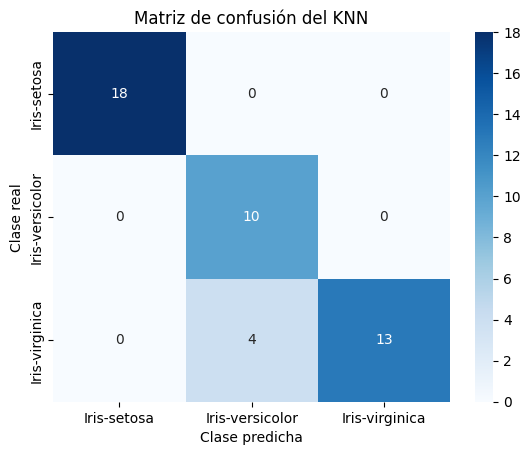

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una columna temporal con los nombres de las especies
species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['Species_name'] = df['Species'].map(species_names)

# Características y etiquetas
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species_name']  # Usamos la columna con nombres

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Entrenamos KNN
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

# Precisión
accuracy = knn.score(X_test, y_test) * 100
print(f"Precisión del modelo KNN: {accuracy:.2f}%")

# Predicciones
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Gráfico de la matriz de confusión con nombres de especies
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.title("Matriz de confusión del KNN")
plt.show()

# Eliminamos la columna temporal si queremos limpiar el DataFrame
df = df.drop(columns=['Species_name'])

Precisión del modelo KNN (implementado a mano): 91.11%


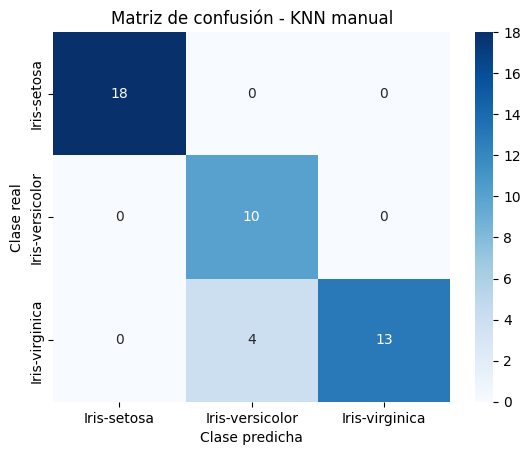

In [12]:
import numpy as np
from collections import Counter

# --- Preparamos los datos (igual que antes) ---
species_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
df['Species_name'] = df['Species'].map(species_names)

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species_name'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# --- Implementación propia de KNN ---
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def predict_one(x, X_train, y_train, k):
    # Calculamos todas las distancias entre x y los puntos de entrenamiento
    distances = [euclidean_distance(x, x_train) for x_train in X_train]
    
    # Obtenemos los índices de los k vecinos más cercanos
    k_indices = np.argsort(distances)[:k]
    
    # Obtenemos sus etiquetas
    k_nearest_labels = [y_train[i] for i in k_indices]
    
    # Devolvemos la etiqueta más común
    return Counter(k_nearest_labels).most_common(1)[0][0]

def predict(X_test, X_train, y_train, k):
    return [predict_one(x, X_train, y_train, k) for x in X_test]

# --- Usamos el modelo ---
k = 27
y_pred = predict(X_test, X_train, y_train, k)

# --- Evaluamos la precisión ---
accuracy = np.mean(y_pred == y_test) * 100
print(f"Precisión del modelo KNN (implementado a mano): {accuracy:.2f}%")

# --- Matriz de confusión ---
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train),
            yticklabels=np.unique(y_train))
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.title("Matriz de confusión - KNN manual")
plt.show()

# Limpiar el DataFrame
df = df.drop(columns=['Species_name'])